<a href="https://colab.research.google.com/github/farahhnfh/Tugas-Python/blob/main/Tugas_P10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
cd /content/drive/MyDrive/Tugas

/content/drive/MyDrive/Tugas


In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
ls

 3scene@  'contoh 2.jpg'   contoh.jpg  'forest contoh.jpg'   model1/


In [82]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [83]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labes
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [84]:
# loop over our input images
for imageOne in imagePaths:

  image = Image.open(imageOne)
  image = np.array(image.resize((64,64))) / 255.0
  data.append(image)

  label = imageOne.split(os.path.sep)[-2]
  labels.append(label)

In [85]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [86]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [87]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [88]:
# training, test split
# training and 25% for eval
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle = True)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [89]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential (
    [
     Flatten(input_shape=(64*64*3,)),
     Dense(100, activation="relu", name="layer1"),
     Dense(16, activation="relu", name="layer2"),
     Dense(16, activation="relu", name ="layer3"),
     Dense(3, activation= "softmax", name="layer4"),
    ]
)

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [91]:
print("training")
opt = Adam(lr=1e-3, decay=1e-3/50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=25, batch_size=32)

training
Epoch 1/25
23/23 [==============================] - 0s 18ms/step - loss: 1.3319 - accuracy: 0.3938 - val_loss: 1.2440 - val_accuracy: 0.3629
Epoch 2/25
23/23 [==============================] - 0s 12ms/step - loss: 1.0107 - accuracy: 0.4923 - val_loss: 0.8253 - val_accuracy: 0.5443
Epoch 3/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8243 - accuracy: 0.6414 - val_loss: 0.8411 - val_accuracy: 0.6118
Epoch 4/25
23/23 [==============================] - 0s 12ms/step - loss: 0.6760 - accuracy: 0.7201 - val_loss: 0.6604 - val_accuracy: 0.7468
Epoch 5/25
23/23 [==============================] - 0s 11ms/step - loss: 0.7336 - accuracy: 0.7159 - val_loss: 0.6412 - val_accuracy: 0.7468
Epoch 6/25
23/23 [==============================] - 0s 12ms/step - loss: 0.7319 - accuracy: 0.7018 - val_loss: 0.7795 - val_accuracy: 0.6371
Epoch 7/25
23/23 [==============================] - 0s 12ms/step - loss: 0.6347 - accuracy: 0.7468 - val_loss: 0.8603 - val_accuracy: 0.5570
Epoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


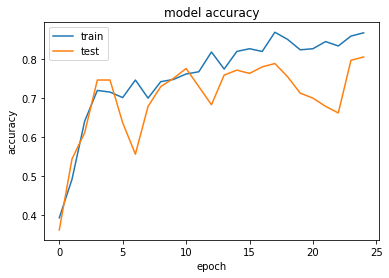

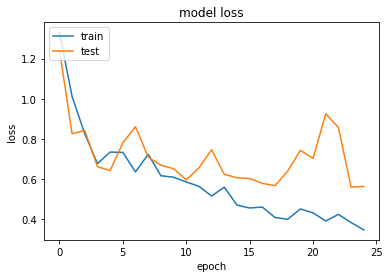

In [92]:
import matplotlib.pyplot as plt

print(H.history.keys())
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [93]:
print("info")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

info
              precision    recall  f1-score   support

       coast       0.77      0.77      0.77        92
      forest       0.90      0.81      0.85        86
     highway       0.75      0.85      0.79        59

    accuracy                           0.81       237
   macro avg       0.81      0.81      0.81       237
weighted avg       0.81      0.81      0.81       237



In [125]:
model.save('model1')

INFO:tensorflow:Assets written to: model1/assets


In [120]:
import cv2
import matplotlib.pyplot as plt
image1='contoh 2.jpg'

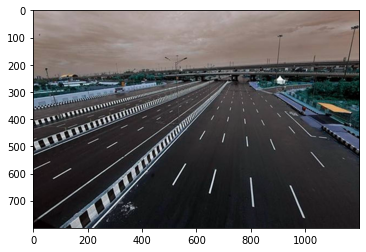

In [121]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [122]:
image_testing = Image.open('contoh 2.jpg')
image_testing = np.array(image_testing.resize((64,64)))/ 255.0
image_testing.shape

(64, 64, 3)

In [123]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [124]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.2688387  0.16544904 0.5657123 ]]
['highway']
